<a href="https://colab.research.google.com/github/colinchu1/CAP4630/blob/master/HW_5/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#General Concept

Artificial intelligence, machine learning, deep learning are subset of each other. deep learning is a subset of machine learning, and machine learning is a subset of artificial intelligence

##Artificial Intelligence

Artificial Intelligence is a branch of computer science dealing with the simulation of intelligent behavior in computers.
The capability of a machine to imitate intelligent human behavior. A computer system able to perform tasks that normally require human intelligence, such as visual perception, speech recognition, decision-making, and translation between languages.

##Machine Learning

Machine learning is field of study that gives computers the ability to learn without being explicitly programmed. Machine-learning programs, in a sense, adjust themselves in response to the data they're exposed to (like a child that is born knowing nothing adjusts its understanding of the world in response to experience). Machine learning is dynamic and does not require human intervention to make certain changes. That makes it less brittle, and less reliant on human experts.

##Deep learning

Deep learning is a subset of machine learning. Usually, when people use the term deep learning, they are referring to deep artificial neural networks, and somewhat less frequently to deep reinforcement learning.

#Basic concepts 

##Linear regression


Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable.

A linear regression line has an equation of the form Y = a + bX, where X is the explanatory variable and Y is the dependent variable. The slope of the line is b, and a is the intercept (the value of y when x = 0).

Estimated coefficients:
b_0 = 1.2363636363636363  \nb_1 = 1.1696969696969697


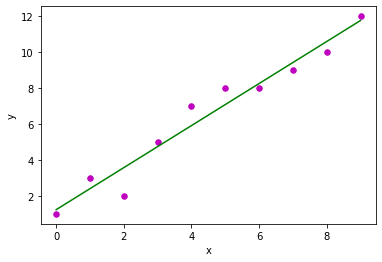

In [0]:
import numpy as np 
import matplotlib.pyplot as plt 
  
def estimate_coef(x, y): 
    # number of observations/points 
    n = np.size(x) 
  
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 
  
def plot_regression_line(x, y, b): 
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
               marker = "o", s = 30) 
  
    # predicted response vector 
    y_pred = b[0] + b[1]*x 
  
    # plotting the regression line 
    plt.plot(x, y_pred, color = "g") 
  
    # putting labels 
    plt.xlabel('x') 
    plt.ylabel('y') 
  
    # function to show plot 
    plt.show() 
  
def main(): 
    # observations 
    x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) 
    y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12]) 
  
    # estimating coefficients 
    b = estimate_coef(x, y) 
    print("Estimated coefficients:\nb_0 = {}  \\nb_1 = {}".format(b[0], b[1])) 
  
    # plotting regression line 
    plot_regression_line(x, y, b) 
  
if __name__ == "__main__": 
    main() 

source: geeksforgeeks.org/linear-regression-python-implementation/

##Logistic regression

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression is estimating the parameters of a logistic model (a form of binary regression). Mathematically, a binary logistic model has a dependent variable with two possible values, such as pass/fail which is represented by an indicator variable, where the two values are labeled "0" and "1"

###Import

In [0]:
import matplotlib
import random
import time
import numpy as np
from sklearn.model_selection import train_test_split

###Get random data

In [0]:
def get_random_data(w, b, mu, sigma, m):
  data = [[] for j in range(m)] 
  labels = []
  for x in range (0,m):
    c = random.randint(0,1)
    x_1 = np.random.uniform()
    n = np.random.normal(mu, sigma)
    x_2 = w * x_1 + b + (-1)**c * n
    data[x].append(x_1)
    data[x].append(x_2)
    labels.append(c)
  return data, labels

mu , sigma = 1.5,0.5
m = 500
w = 2
b = 0
data, labels = get_random_data(w,b,mu,sigma,m)
data = np.array(data)
labels = np.array(labels)

###Split data

In [0]:
X_train, X_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.2)

###Predict function, logistic regression is to predict if the data is 1 or 0

In [0]:
def predict(a):
    return 0 if a < 0.5 else 1

In [0]:
def sigmoid (z):
    return 1 / (1 + np.exp(-z))

### loss function how far off is the prediction compare to the true value
this is a binary crossentropy loss function used for logistic regression

In [0]:
def binary_crossentropy(a, label):
    return -label*np.log(a) - (1 - label)*np.log(1 - a)

###Logistic regression and test model

In [0]:
def test_model(test_data, test_labels, W_b):
    correct_predictions = 0
    total_loss = 0
    testd = np.column_stack((test_data, np.ones(shape=(test_data.shape[0], 1))))
    for i_data in range(len(test_data)):
        # Process the input
        z = np.dot(testd[i_data], W_b)
        a = sigmoid(z)

        # Make a prediction
        p = predict(a)
        if p == test_labels[i_data]:
            correct_predictions += 1
        
        # Determine loss
        total_loss += binary_crossentropy(a, test_labels[i_data])
    # Return a summary
    print(total_loss)
    return (total_loss / len(test_data), correct_predictions / len(test_data))
def logistic_regression(train_data, train_labels, test_data, test_labels, epochs, learing_rate):
    # Randomize the initial weights
    W_b = np.random.random_sample((3, ))
    #combine data with biases
    trd = np.column_stack((X_train, np.ones(shape=(X_train.shape[0], 1))))
    for epoch in range(epochs):
        # Only perform stochastic gradient descent
        for i_data in range(len(train_data)):
            # Process the input
            z = np.dot(trd[i_data], W_b)
            a = sigmoid(z)

            # Determine the gradient of the loss
            Lg_b = (a- train_labels[i_data])* trd[i_data]

            # Apply the gradient to the weights
            W_b -= Lg_b * learning_rate
        
        # Analyze the loss and accuracy for each epoch
        loss, accuracy = test_model(test_data, test_labels, W_b)
        print(f'Epoch {epoch+1}/{epochs} - val_loss: {loss} - val_accuracy: {accuracy}')
    
    # Return the trained weights
    return W_b

Doing logistic regression

In [0]:
epochs = 10
learning_rate = 0.01

W_b = logistic_regression(X_train, labels_train, X_test, labels_test, epochs, learning_rate)

20.501220498190257
Epoch 1/10 - val_loss: 0.20501220498190256 - val_accuracy: 0.97
15.68248720256308
Epoch 2/10 - val_loss: 0.15682487202563078 - val_accuracy: 0.97
13.175211392612159
Epoch 3/10 - val_loss: 0.1317521139261216 - val_accuracy: 0.97
11.582010724848129
Epoch 4/10 - val_loss: 0.11582010724848128 - val_accuracy: 0.97
10.472296603493962
Epoch 5/10 - val_loss: 0.10472296603493962 - val_accuracy: 0.97
9.65219751802457
Epoch 6/10 - val_loss: 0.0965219751802457 - val_accuracy: 0.97
9.019659132628556
Epoch 7/10 - val_loss: 0.09019659132628556 - val_accuracy: 0.97
8.515624074861742
Epoch 8/10 - val_loss: 0.08515624074861743 - val_accuracy: 0.97
8.10352828327272
Epoch 9/10 - val_loss: 0.08103528283272719 - val_accuracy: 0.97
7.759525457112547
Epoch 10/10 - val_loss: 0.07759525457112547 - val_accuracy: 0.97


###Gradient

the Gradient is a vector-valued function that stores partial derivatives. In other words, the gradient is a vector, and each of its components is a partial derivative with respect to one specific variable.
Take the function, f(x, y) = 2x² + y² as another example.
Here, f(x, y) is a multi-variable function. It would be f(x,y) = [4x,2y]

###Gradient descent
Gradient descent is an optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. In machine learning, we use gradient descent to update the parameters of our model.

In above logistic regression model our gradient descent is

 find the loss: Lg_b = (a- train_labels[i_data])* trd[i_data]

 apply the loss gradient: W_b -= Lg_b * learning_rate



> for gradient descent there is batch, Mini-batch, and Stochastic

> batch - use all the data

> Mini-batch - use a subset of the data

> stochastic = use 1 element from the data



##Building a model

In this class we have mainly used keras model

To build a keras only require a few line of code

In [0]:
from keras import layers
from keras import models
from keras import optimizers

Using TensorFlow backend.


In [0]:
model = models.Sequential()

###Convolution 2D layer

This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs. If use_bias is True, a bias vector is created and added to the outputs. Finally, if activation is not None, it is applied to the outputs as well.

Given an input matrix of $\begin{bmatrix}
1, 0, 0, 0 \\
0, 1, 0, 0 \\
0, 0, 1, 0 \\
0, 0, 0, 1
\end{bmatrix}$ , and a kernel of $\begin{bmatrix}
1, 0 \\
0, 1
\end{bmatrix}$ would produce an output of $\begin{bmatrix}
2, 0, 0 \\
0, 2, 0 \\
0, 0, 2
\end{bmatrix}$

below code is how a simple conv2d layer will work

In [0]:
def conv2d(input_mat, kernel_mat):
  #if kernel matrix is bigger than input matrix operation can not be perform
  #return empty matrix
  out = []
  if(input_mat.shape[0]<kernel_mat.shape[0]):
    print("error, operation can not be performed")
    return out
  #sub shape will be the size of kernel matrix
  sub_shape = kernel_mat.shape
  view_shape = tuple(np.subtract(input_mat.shape, sub_shape) + 1) + sub_shape
  strides = input_mat.strides + input_mat.strides
  #create all the sub matrix
  sub_matrices = np.lib.stride_tricks.as_strided(input_mat,view_shape,strides)
  #using einsum top find the result matrix
  out = np.einsum('xyij,ij->xy',sub_matrices,kernel_mat)
  
  return out

###Flatten layer
Flatten is used to flatten the input. For example, if flatten is applied to layer having input shape as (batch_size, 2,2), then the output shape of the layer will be (batch_size, 4)

###Dense layer

Dense layer is the regular deeply connected neural network layer. It is most common and frequently used layer. Dense layer does the below operation on the input and return the output.

###Dropout layer
Dropout is a regularization technique patented by Google for reducing overfitting in neural networks by preventing complex co-adaptations on training data.

##Activation function
Neural network activation functions are a crucial component of deep learning. Activation functions determine the output of a deep learning model, its accuracy, and also the computational efficiency of training a model—which can make or break a large scale neural network. 

below we will use **relu** and **sigmoid**

**Relu** - The Rectified Linear Unit is the most commonly used activation function in deep learning models. The function returns 0 if it receives any negative input, but for any positive value  x  it returns that value back. So it can be written as  f(x)=max(0,x) .

**Sigmoid** - The main reason why we use sigmoid function is because it exists between (0 to 1). Therefore, it is especially used for models where we have to predict the probability as an output.Since probability of anything exists only between the range of 0 and 1, sigmoid is the right choice.


###This is a convolutional base i chose mobilenetV2
inside a convolutional base it contains many layers like conv2d, maxpooling and more

In [0]:
from keras.applications import MobileNetV2

conv_base = MobileNetV2(
    weights='imagenet', 
    include_top=False, 
    input_shape=(150, 150, 3))

/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


9412608/9406464 [==============================] - 2s 0us/step


Freezeing the base for future fine tuning

In [0]:
conv_base.trainable = False

We will add the base to all the previously mentioned layers

In [0]:
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
flatten_1 (Flatten)          (None, 32000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               8192256   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 10,450,497
Trainable params: 8,192,513
Non-trainable params: 2,257,984
_________________________________________________________________


##Compiling the model

###When compiling a model you need to choose a loss function and a optimizers


The Loss Function is one of the important components of Neural Networks. Loss is nothing but a prediction error of Neural Net. And the method to calculate the loss is called Loss Function. In simple words, the Loss is used to calculate the gradients.

**Cross-entropy loss**, or log loss, measures the performance of a classification model whose output is a probability value between 0 and 1. Cross-entropy loss increases as the predicted probability diverges from the actual label. So predicting a probability of .012 when the actual observation label is 1 would be bad and result in a high loss value. A perfect model would have a log loss of 0.

optimizers shape and mold your model into its most accurate possible form by futzing with the weights. The loss function is the guide to the terrain, telling the optimizer when it’s moving in the right or wrong direction.

Noteable Optimizer

*   Adam
*   RMSprop (root mean square)
*   SGD(Stochastic gradient descent)


in side  optimizer there is a paramerter called learning rate

the learning rate is a configurable hyperparameter used in the training of neural networks that has a small positive value, often in the range between 0.0 and 1.0. The learning rate controls how quickly the model is adapted to the problem.

In [0]:
model.compile(
    loss='binary_crossentropy', 
    optimizer=optimizers.RMSprop(lr=2e-5), 
    metrics=['acc'])

#training a model

We will use the same data from Home work 4

In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

--2020-04-22 04:06:45--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.128, 2404:6800:4008:c01::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  76.8MB/s    in 0.9s    

2020-04-22 04:06:46 (76.8 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [0]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=50,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
50/50 [==============================] - 22s 436ms/step - loss: 0.4868 - acc: 0.7770 - val_loss: 0.1998 - val_acc: 0.9070
Epoch 2/30
50/50 [==============================] - 12s 240ms/step - loss: 0.3870 - acc: 0.8210 - val_loss: 0.2986 - val_acc: 0.8520
Epoch 3/30
50/50 [==============================] - 12s 240ms/step - loss: 0.3340 - acc: 0.8610 - val_loss: 0.4033 - val_acc: 0.9240
Epoch 4/30
50/50 [==============================] - 12s 240ms/step - loss: 0.3037 - acc: 0.8670 - val_loss: 0.6456 - val_acc: 0.9030
Epoch 5/30
50/50 [==============================] - 12s 242ms/step - loss: 0.2745 - acc: 0.8900 - val_loss: 0.0055 - val_acc: 0.9220
Epoch 6/30
50/50 [==============================] - 12s 241ms/step - loss: 0.2928 - acc: 0.8780 - val_loss: 0.7334 - val_acc: 0.8770
Epoch 7/30
50/50 [==============================] - 12s 240ms/step - loss: 0.2914 - acc: 0.8740 - val_loss: 0.0019 - v

Printing validation loss and accruacy

In [0]:
val_loss, val_acc = model.evaluate_generator(validation_generator, steps=50)

In [0]:
print("Validation loss:", val_loss)
print("Validation accuracy:", val_acc)

Validation loss: 0.276877224445343
Validation accuracy: 0.9120000004768372


#Fine-Tuning

Fine tuning machine learning predictive model is a crucial step to improve accuracy of the forecasted results. 

In upcoming example we will unfreeze a layer and train it again

Unfreezing block_5_expand layer

In [0]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block_5_expand':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [0]:
# compile model

model.compile(
    loss='binary_crossentropy',
    #
    # choose a smaller learning rate
    #
    optimizer=optimizers.RMSprop(lr=1e-5), 
    metrics=['acc'])

# train

history = model.fit_generator(
    train_generator,
    steps_per_epoch=50,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
50/50 [==============================] - 25s 500ms/step - loss: 0.2019 - acc: 0.9110 - val_loss: 0.3797 - val_acc: 0.9110
Epoch 2/30
50/50 [==============================] - 14s 283ms/step - loss: 0.2020 - acc: 0.9190 - val_loss: 0.1539 - val_acc: 0.9190
Epoch 3/30
50/50 [==============================] - 14s 282ms/step - loss: 0.1776 - acc: 0.9290 - val_loss: 0.2176 - val_acc: 0.9260
Epoch 4/30
50/50 [==============================] - 14s 285ms/step - loss: 0.1851 - acc: 0.9220 - val_loss: 0.4765 - val_acc: 0.9250
Epoch 5/30
50/50 [==============================] - 14s 284ms/step - loss: 0.1757 - acc: 0.9260 - val_loss: 0.1121 - val_acc: 0.9360
Epoch 6/30
50/50 [==============================] - 14s 283ms/step - loss: 0.1432 - acc: 0.9430 - val_loss: 0.0311 - val_acc: 0.9350
Epoch 7/30
50/50 [==============================] - 14s 285ms/step - loss: 0.1895 - acc: 0.9250 - val_loss: 0.0282 - val_acc: 0.9420
Epoch 8/30
50/50 [==============================] - 14s 283ms/step - 

printing the result

In [0]:
val_loss, val_acc = model.evaluate_generator(validation_generator, steps=50)

In [0]:
print("Validation loss:", val_loss)
print("Validation accuracy:", val_acc)

Validation loss: 0.0005004612030461431
Validation accuracy: 0.9649999737739563


**there is a big increase in accuracy from 91% tp 96.5%**

In summary for this course i learned a lot of tools that i can use in the future of my career. all type of gradient descent, keras model, linear regression, logistic regression. Max pooling, convolution network, conv2d. all these are really useful knowledge. through out the course i also picked up python to learn all the algorithm